In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Load the dataset
data_path = "C:/Users/Sandip/OneDrive/Desktop/Machine Learning/Car_Safety/Car_Safety_Data.csv"
data = pd.read_csv(data_path, header=None)

# Load the dataset and assign the first row as the column headers
data = pd.read_csv(data_path, header=0)


In [5]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
# Split the data into features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Make predictions
y_pred = knn.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(report)

Accuracy: 91.33%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       118
           1       0.67      0.53      0.59        19
           2       0.93      1.00      0.96       358
           3       1.00      0.67      0.80        24

    accuracy                           0.91       519
   macro avg       0.87      0.74      0.79       519
weighted avg       0.91      0.91      0.91       519



In [13]:
# ---- Feature Importance Analysis ----
# Using Random Forest to calculate feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [14]:
# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n")
print(importance_df)



Feature Importances:

    Feature  Importance
5    safety    0.269221
3   persons    0.217266
0    buying    0.192575
1     maint    0.160568
4  lug_boot    0.093394
2     doors    0.066976


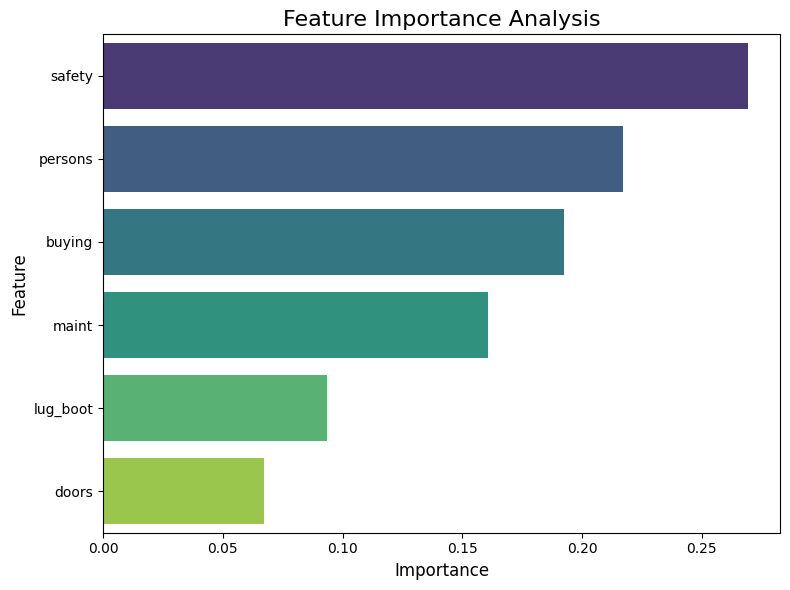

In [15]:
# Plotting Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance Analysis", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

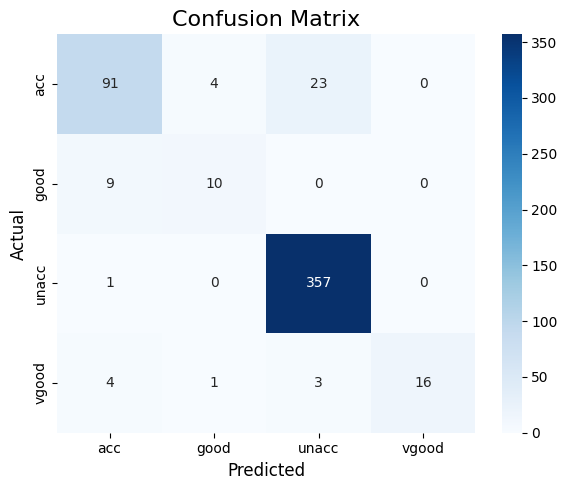

In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()
